In [228]:
import os, sys, codecs
import numpy as np
import pandas as pd

%pylab inline
import seaborn as sns; sns.set()
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


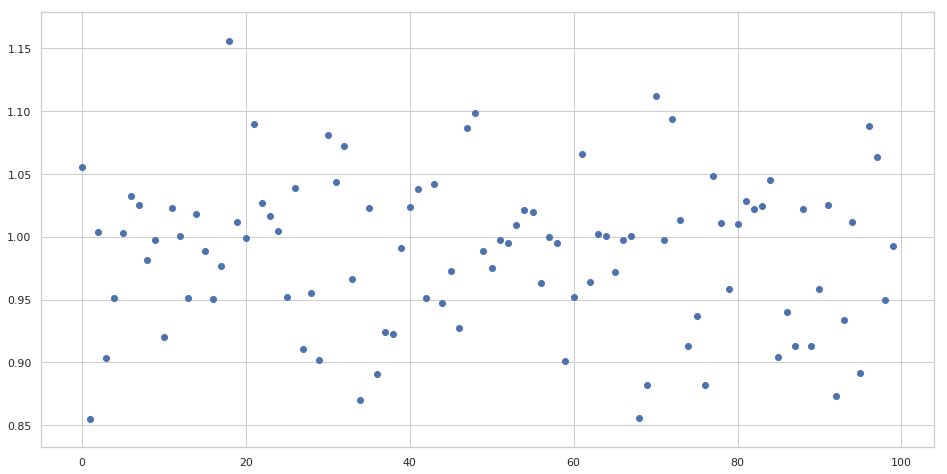

In [595]:
train_loss = codecs.open('./example.log').readlines()[-100:]
train_loss = [float(x.split('\t')[-1][:-2]) for x in train_loss]

plt.figure(figsize=(16, 8))
plt.scatter(range(len(train_loss)), train_loss)
# plt.title('Train loss')
# plt.xlabel('Batch')

/usr/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


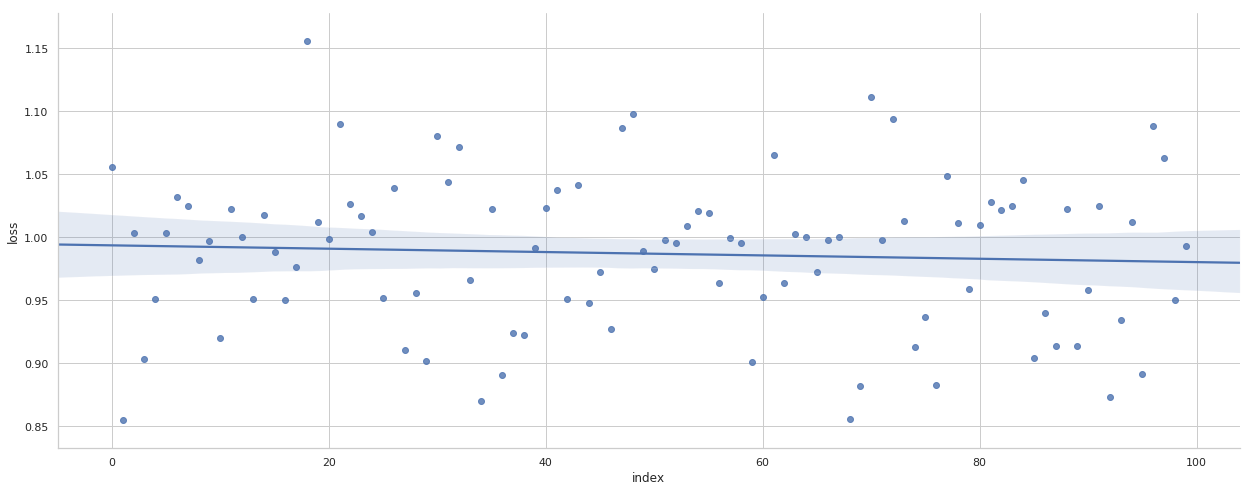

In [596]:
train_loss = pd.DataFrame({'index': range(len(train_loss)), 'loss': train_loss})

sns.pairplot(train_loss, x_vars=['index'], y_vars='loss', size=7, kind='reg', aspect=2.5,)

Text(0.5,1,'Accuracy curve')

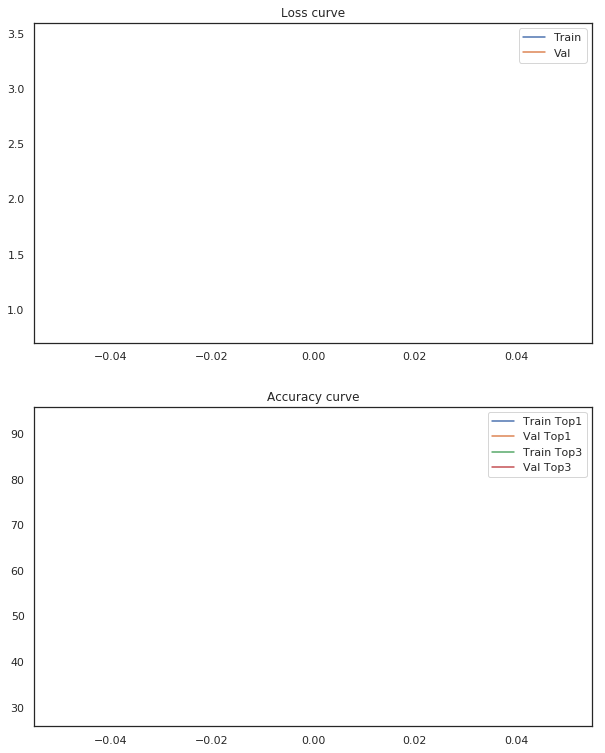

In [167]:
train_log = codecs.open('./nohup.out').readlines()[1:]
train_log = [x[:-1].split('\t\t') for x in train_log]

train_loss, val_loss = [], []
train_top1, val_top1 = [], []
train_top3, val_top3 = [], []
for log in train_log[1:]:
    if 'Epoch' in log[0] or 'Train' in log[0]:
        continue
    
    train_loss.append(float(log[1].split('/')[0]))
    val_loss.append(float(log[2].split('/')[0]))
    
    train_top1.append(float(log[1].split('/')[1]))
    val_top1.append(float(log[2].split('/')[1]))
    
    train_top3.append(float(log[1].split('/')[2]))
    val_top3.append(float(log[2].split('/')[2]))

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.plot(range(len(train_loss)), train_loss)
plt.plot(range(len(val_loss)), val_loss)
plt.legend(['Train', 'Val'])
plt.title('Loss curve')

plt.subplot(3, 1, 2)
plt.plot(range(len(train_top1)), train_top1)
plt.plot(range(len(val_top1)), val_top1)

plt.plot(range(len(train_top3)), train_top3)
plt.plot(range(len(val_top3)), val_top3)
plt.legend(['Train Top1', 'Val Top1', 'Train Top3', 'Val Top3'])
plt.title('Accuracy curve')

In [146]:
'Train' in log

False

In [147]:
log

["('Train:', 16500000, 'Val', 500000)"]